In [99]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer()
print(data.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [100]:
df=pd.DataFrame(data.data,columns=data.feature_names)
df['malignant']=1-data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,malignant
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


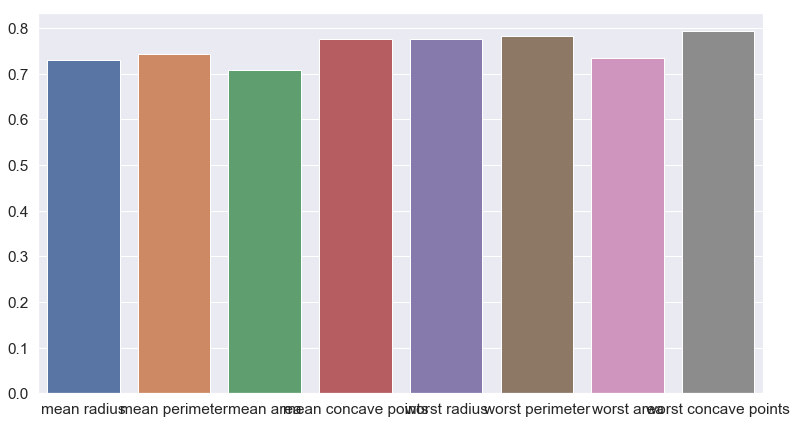

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(13,7))
cor=df.corr()
masked=cor[np.abs(cor['malignant'])>0.7]['malignant']
sns.barplot(x=masked.index[:-1],y=masked.values[:-1])
sns.set(font_scale=0.8)

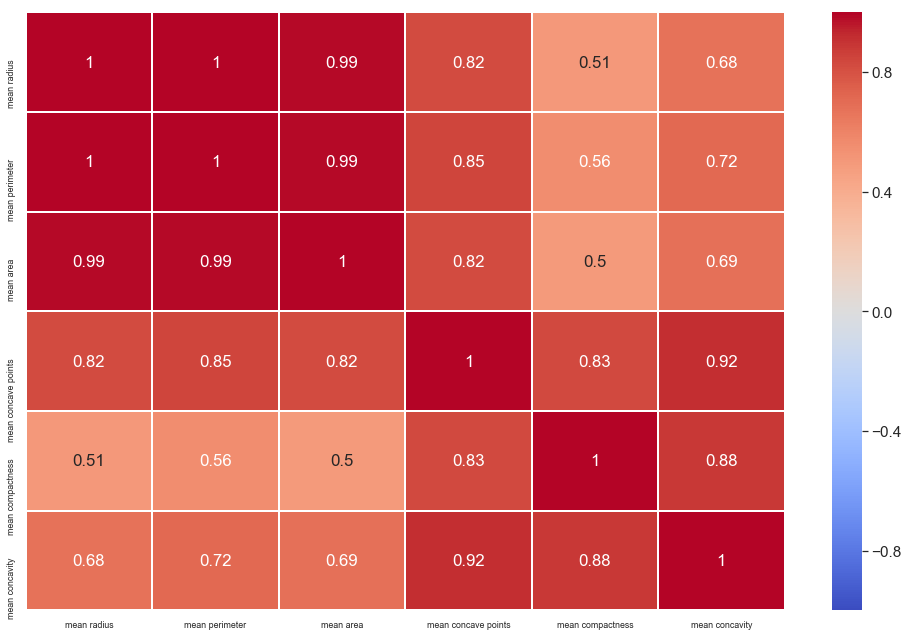

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

small_df = df[['mean radius', 'mean perimeter', 'mean area', 'mean concave points', 'mean compactness', 'mean concavity']]

fig, axBoston = plt.subplots(figsize = (17,11))
sns.set(font_scale=1.4)
sns.heatmap(small_df.corr(), annot = True, linewidth = 1, vmin = -1, vmax = 1, cmap ="coolwarm", ax = axBoston);

In [103]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [104]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
ss=StandardScaler()
X=df.drop('malignant',axis=1)
y=df['malignant']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)


In [105]:
model.fit(X_train,y_train)
model.score(X_train,y_train),model.score(X_test,y_test)

(0.9868131868131869, 0.9736842105263158)

In [106]:
from sklearn.model_selection import GridSearchCV
params={
    'C': np.logspace(-5,5,15),
    'penalty': ['l1','l2'],
    'fit_intercept': [True,False]
}

In [107]:
grid=GridSearchCV(model,params,cv=5,scoring='accuracy',return_train_score=True,verbose=1)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    3.5s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-05, 5.17947e-05, 2.68270e-04, 1.38950e-03, 7.19686e-03,
       3.72759e-02, 1.93070e-01, 1.00000e+00, 5.17947e+00, 2.68270e+01,
       1.38950e+02, 7.19686e+02, 3.72759e+03, 1.93070e+04, 1.00000e+05]), 'penalty': ['l1', 'l2'], 'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [108]:
grid.best_estimator_

LogisticRegression(C=0.19306977288832497, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [109]:
grid.best_score_

0.978021978021978

In [110]:
from sklearn.model_selection import cross_val_score
cross_val_score(grid.best_estimator_,X_train,y_train,cv=5).mean()

0.9779481870786219

In [111]:
grid.score(X_train,y_train),grid.score(X_test,y_test)

(0.9802197802197802, 0.9649122807017544)

In [112]:
grid.best_params_

{'C': 0.19306977288832497, 'fit_intercept': True, 'penalty': 'l1'}

In [113]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_fit_intercept,param_penalty,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001997,0.000921,0.000592,0.000183,1e-05,True,l1,"{'C': 1e-05, 'fit_intercept': True, 'penalty':...",0.630435,0.626374,...,0.628571,0.002844,53,0.628099,0.629121,0.629121,0.629121,0.627397,0.628572,0.000708
1,0.001898,0.000499,0.000614,0.000187,1e-05,True,l2,"{'C': 1e-05, 'fit_intercept': True, 'penalty':...",0.880435,0.934066,...,0.925275,0.024896,47,0.939394,0.923077,0.920330,0.934066,0.923288,0.928031,0.007374
2,0.001784,0.001107,0.000465,0.000181,1e-05,False,l1,"{'C': 1e-05, 'fit_intercept': False, 'penalty'...",0.630435,0.626374,...,0.628571,0.002844,53,0.628099,0.629121,0.629121,0.629121,0.627397,0.628572,0.000708
3,0.001589,0.000449,0.000487,0.000168,1e-05,False,l2,"{'C': 1e-05, 'fit_intercept': False, 'penalty'...",0.891304,0.934066,...,0.918681,0.015934,50,0.936639,0.923077,0.920330,0.931319,0.923288,0.926930,0.006086
4,0.001373,0.000733,0.000422,0.000151,5.17947e-05,True,l1,"{'C': 5.1794746792312125e-05, 'fit_intercept':...",0.630435,0.626374,...,0.628571,0.002844,53,0.628099,0.629121,0.629121,0.629121,0.627397,0.628572,0.000708
5,0.001876,0.001056,0.000422,0.000126,5.17947e-05,True,l2,"{'C': 5.1794746792312125e-05, 'fit_intercept':...",0.880435,0.934066,...,0.925275,0.024896,47,0.939394,0.923077,0.920330,0.934066,0.923288,0.928031,0.007374
6,0.001305,0.000428,0.000809,0.000581,5.17947e-05,False,l1,"{'C': 5.1794746792312125e-05, 'fit_intercept':...",0.630435,0.626374,...,0.628571,0.002844,53,0.628099,0.629121,0.629121,0.629121,0.627397,0.628572,0.000708
7,0.002068,0.000884,0.000598,0.000344,5.17947e-05,False,l2,"{'C': 5.1794746792312125e-05, 'fit_intercept':...",0.891304,0.934066,...,0.923077,0.019154,49,0.936639,0.925824,0.925824,0.936813,0.931507,0.931322,0.004877
8,0.001411,0.000406,0.000537,0.000194,0.00026827,True,l1,"{'C': 0.0002682695795279727, 'fit_intercept': ...",0.630435,0.626374,...,0.628571,0.002844,53,0.628099,0.629121,0.629121,0.629121,0.627397,0.628572,0.000708
9,0.001705,0.000334,0.000535,0.000162,0.00026827,True,l2,"{'C': 0.0002682695795279727, 'fit_intercept': ...",0.891304,0.934066,...,0.929670,0.024182,45,0.942149,0.928571,0.925824,0.939560,0.928767,0.932974,0.006569
